In [1]:
import pandas as pd
data = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
data

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0


In [2]:
data1 = pd.read_csv('malicious_phish.csv')
data1

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [5]:
import pandas as pd

# Load the datasets
phishing_data = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
legit_data = pd.read_csv("malicious_phish.csv")

# Rename 'url' column in legit data to match the 'URL' column in phishing data
legit_data.rename(columns={'url': 'URL'}, inplace=True)

# Drop rows with missing URLs in both datasets
phishing_data = phishing_data.dropna(subset=["URL"])
legit_data = legit_data.dropna(subset=["URL"])

# Add labels (1 for phishing, 0 for legitimate)
phishing_data["label"] = 1
legit_data["label"] = 0

# Concatenate both datasets
combined_data = pd.concat([phishing_data[['URL', 'label']], legit_data[['URL', 'label']]], ignore_index=True)

# Now, the combined dataset should contain URLs and labels with no missing data
print("Combined Data Sample:")
print(combined_data.head())

# Save the combined data if needed
combined_data.to_csv('combined_data.csv', index=False)


Combined Data Sample:
                                  URL  label
0    https://www.southbankmosaics.com      1
1            https://www.uni-mainz.de      1
2      https://www.voicefmradio.co.uk      1
3         https://www.sfnmjournal.com      1
4  https://www.rewildingargentina.org      1


In [6]:
import re
from urllib.parse import urlparse

# Feature extraction function
def extract_features(url):
    features = {}
    
    # URL length
    features['url_length'] = len(url)
    
    # Number of special characters in the URL
    features['num_special_chars'] = len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', url))
    
    # Number of subdomains
    features['num_subdomains'] = len(urlparse(url).netloc.split('.')) - 1
    
    # Whether the URL contains HTTPS
    features['has_https'] = 1 if 'https' in url else 0
    
    # Check if the URL is an IP address
    features['is_ip_address'] = 1 if re.match(r'\d+\.\d+\.\d+\.\d+', urlparse(url).netloc) else 0
    
    # Other potential features could go here
    
    return features

# Apply the feature extraction to both datasets
features = pd.DataFrame([extract_features(url) for url in combined_data['URL']])

# Combine the extracted features with the target labels
X = features  # Features
y = combined_data['label']  # Target labels

# Display the extracted features
print(X.head())


   url_length  num_special_chars  num_subdomains  has_https  is_ip_address
0          32                  3               2          1              0
1          24                  3               2          1              0
2          30                  4               3          1              0
3          27                  3               2          1              0
4          34                  3               2          1              0


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (709588, 5)
Test set size: (177398, 5)


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [9]:
# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model Accuracy: 0.9774743796435135
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    130202
           1       0.96      0.96      0.96     47196

    accuracy                           0.98    177398
   macro avg       0.97      0.97      0.97    177398
weighted avg       0.98      0.98      0.98    177398



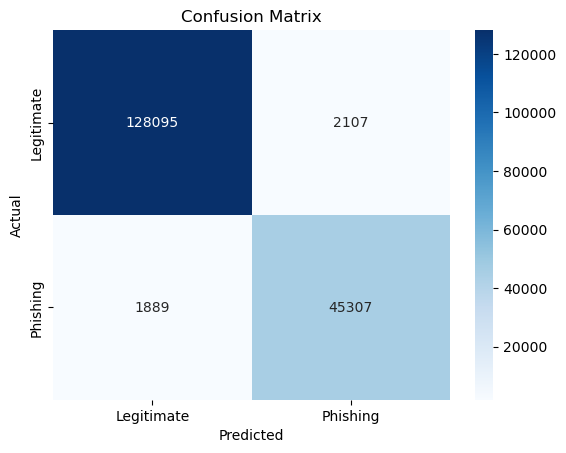

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)



             Feature  Importance
3          has_https    0.392448
2     num_subdomains    0.308135
0         url_length    0.165511
1  num_special_chars    0.115881
4      is_ip_address    0.018025


In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.98518585 0.98430075 0.98422747 0.98273928 0.85315986]


In [13]:
import joblib
joblib.dump(model, 'phishing_detector.pkl')


['phishing_detector.pkl']

In [15]:
# Example Input URLs
sample_urls = ["www.jio.com", "https://www.virussamples.com/"]

# Feature Extraction and Prediction
def classify_links(links, model):
    results = []
    for link in links:
        features = pd.DataFrame([extract_features(link)])
        prediction = model.predict(features)[0]
        results.append((link, 'Phishing' if prediction == 1 else 'Not a Phishing'))
    return results

# Classification
predictions = classify_links(sample_urls, model)

# Display Output
for link, label in predictions:
    print(f"URL: {link}, Classified as: {label}")


URL: www.jio.com, Classified as: Not a Phishing
URL: https://www.virussamples.com/, Classified as: Phishing
